In [97]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as  pd

In [99]:
df = pd.read_csv("GSAF5_src.csv", delimiter=";")
df_c = pd.read_csv("GSAF5_clean.csv")
# Trim spaces at both ends
df.columns = df.columns.str.strip()

In [100]:
#df.columns.values.tolist()

In [101]:
valid_columns = ["Case_Number","Country","Date","Year","Type","Area","Location","Activity","Name","Sex","Age","Injury","Fatal_(Y/N)","Time","Species","Investigator_or_Source"]

In [102]:
# Add underscore between in column name
df.columns = df.columns.str.replace(' ','_')
df_c.columns = df_c.columns.str.replace(' ','_')

In [103]:
# Remove unnecesary columns
df = df[valid_columns]
df_c = df_c[valid_columns]

In [104]:
# Clean rows with NaN values. 
df.dropna(how='all', inplace=True)
df_c = df_c[df_c["Case_Number"] != "0"]
df_c = df_c[df_c["Case_Number"] != "xx"]

# Ataques por pais

In [124]:
df_atck_by_country = df_c.groupby('Country')["Country"].count().reset_index(name="count")
df_atck_by_country.sort_values(by=['count'], inplace=True)

In [125]:
df_atck_by_country

,Country,count
0,ADMIRALTY ISLANDS,1
105,MID-PACIFC OCEAN,1
103,MAYOTTE,1
94,Kingdom of Africa,1
93,KOREA,1
...,...,...
138,Papua New Guinea,136
126,New Zealand,139
170,South Africa,589
12,Australia,1429


# Ataques de paises vs otros

In [131]:
df_atck = df_c.groupby('Country')["Country"].count().reset_index(name="count")
df_atck_other = df_c[df_c['Country'] == "OTHER"]['Country'].count()
df_atck_all = df_c[df_c['Country'] != "OTHER"]['Country'].count()
df_atck_comparison = pd.DataFrame(data={"Country": ["All", "OTHER"], "count": [df_atck_all, df_atck_other]})

In [132]:
df_atck_comparison

,Country,count
0,All,6649
1,OTHER,50


Text(0.5, 1.0, 'Ataques de tiburones en paises reconocidos vs OTHER')

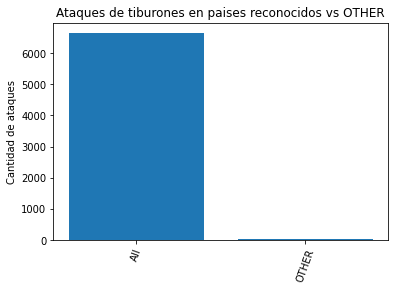

In [134]:
plt.bar(_df["Country"], _df["count"])
plt.xticks(rotation=70)
plt.ylabel("Cantidad de ataques")
plt.title("Ataques de tiburones en paises reconocidos vs OTHER")

# Paises con más ataques

In [135]:
#df_atck_by_country.nlargest(20, ["count"]).plot.bar()
_df = df_atck_by_country.nlargest(8, ["count"])
_df = _df[_df["Country"] != "OTHER"]


In [136]:
_df

,Country,count
189,United States of America,2428
12,Australia,1429
170,South Africa,589
126,New Zealand,139
138,Papua New Guinea,136
13,BAHAMAS,126
26,Brazil,117
111,Mexico,96


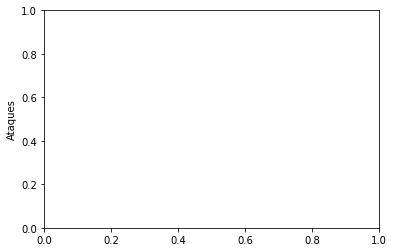

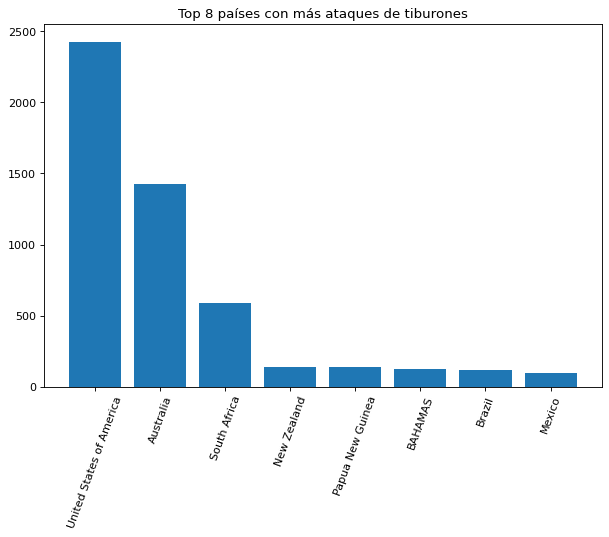

In [137]:

plt.ylabel("Ataques")
plt.figure(figsize=(9, 6), dpi=80)
plt.xticks(rotation=70)
plt.title("Top 8 países con más ataques de tiburones")
plt.bar(_df["Country"], _df["count"])
plt.show()

# Ataques por tipo

In [138]:
df_atck_by_type = df_c.groupby('Type')["Type"].count().reset_index(name="count")
df_atck_by_type.sort_values(by=['count'], inplace=True)

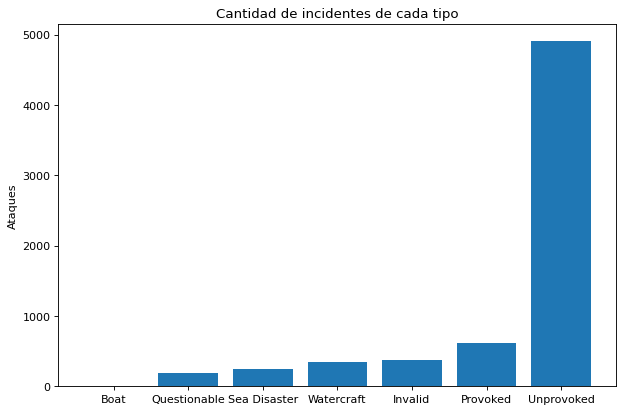

In [140]:

plt.figure(figsize=(9, 6), dpi=80)
plt.bar(df_atck_by_type["Type"], df_atck_by_type["count"])
plt.ylabel("Ataques")
plt.title("Cantidad de incidentes de cada tipo")
plt.show()